In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
sys.path.append('../common')
from commonfunctions import visualize_cluster_data

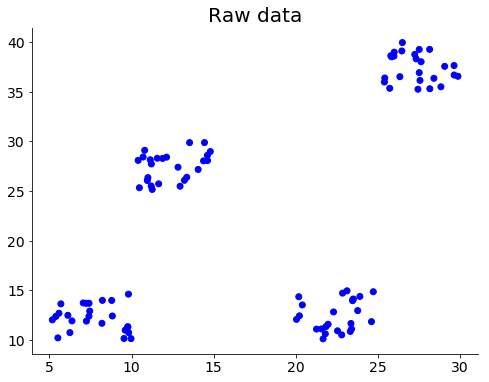

In [3]:
# Read the dataset
dataset = pd.read_csv('../Data/cluster1.csv')
X = dataset.iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')

Apply MeanShift with default parameters

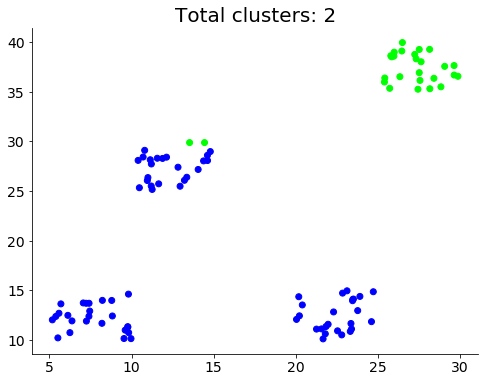

In [4]:
# Perform k-means
from sklearn.cluster import MeanShift

estimator = MeanShift()
estimator.fit(X)
total_clusters = len(set(estimator.labels_)) - (1 if -1 in estimator.labels_ else 0) 
visualize_cluster_data(plt, X, estimator.labels_, 'Total clusters: ' + (str)(total_clusters), filename='file1nobandwidth')

The clustering in this case does not look good. This is because we have used the default bandwidth parameter

Calculate the bandwidth based on structure of data

In [5]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.2)

Now fit the clustering algorithm based on this bandwidth

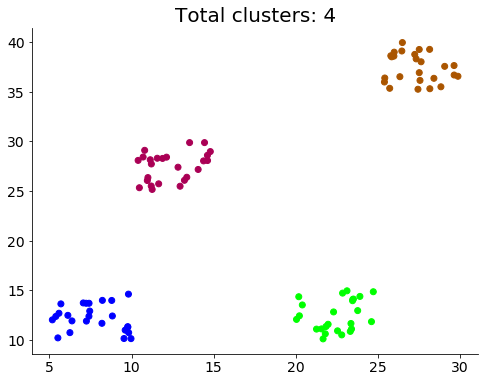

In [6]:
estimator = MeanShift(bandwidth=bandwidth)
estimator.fit(X)
total_clusters = len(set(estimator.labels_)) - (1 if -1 in estimator.labels_ else 0) 
visualize_cluster_data(plt, X, estimator.labels_, 'Total clusters: ' + (str)(total_clusters), filename='file1bandfine')

In this case, the output is showing 4 well formed clusters. Let us now apply this to second dataset

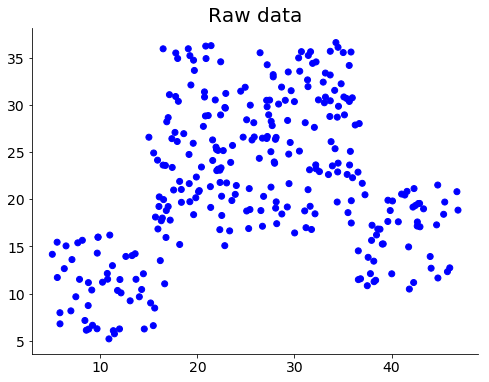

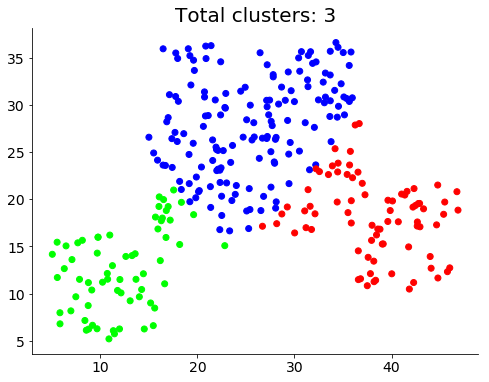

In [7]:
# Check the circles case
X = pd.read_csv('../Data/cluster2.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')

# Calculate bandwidth again
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Fit the clustering algorithm
estimator = MeanShift(bandwidth = bandwidth)
estimator.fit(X)

# Visualize results
total_clusters = len(set(estimator.labels_)) - (1 if -1 in estimator.labels_ else 0) 
visualize_cluster_data(plt, X, estimator.labels_, 'Total clusters: ' + (str)(total_clusters), filename='file2bandfine')

We can get finer results by using the bin_seeding = True option

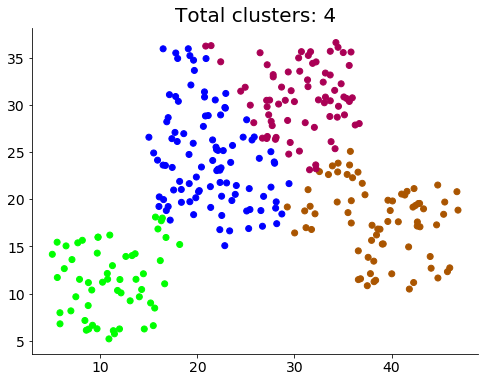

In [8]:
# Fit the clustering estimator
estimator = MeanShift(bandwidth = bandwidth, bin_seeding=True)
estimator.fit(X)

# Visualize the results
total_clusters = len(set(estimator.labels_)) - (1 if -1 in estimator.labels_ else 0) 
visualize_cluster_data(plt, X, estimator.labels_, 'Total clusters: ' + (str)(total_clusters), filename='file2bandcoarse')

Check the output for all remaining data sets

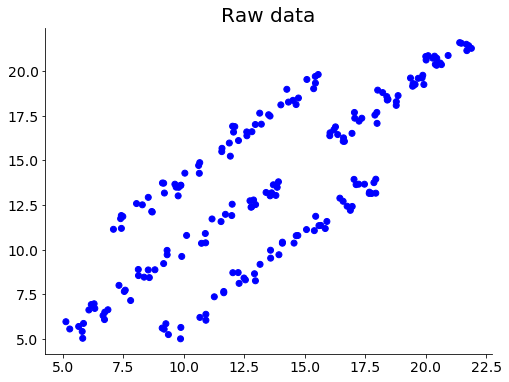

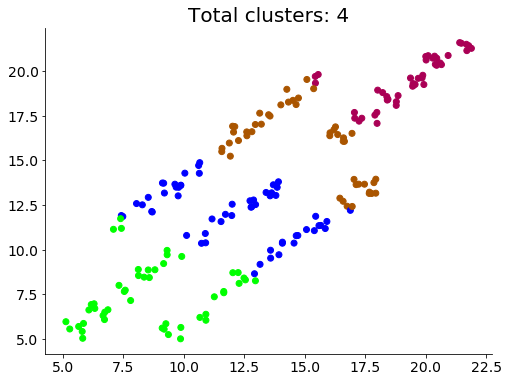

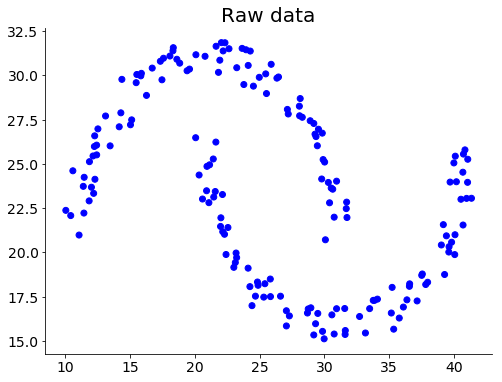

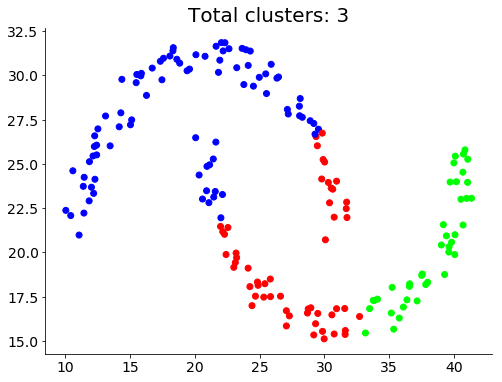

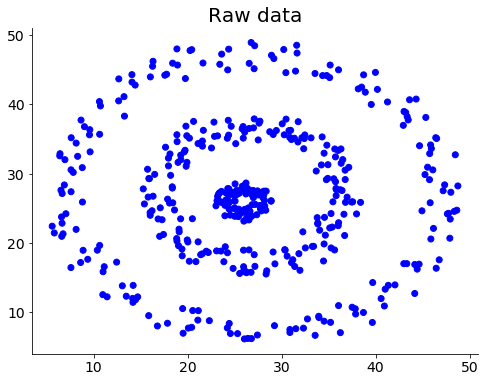

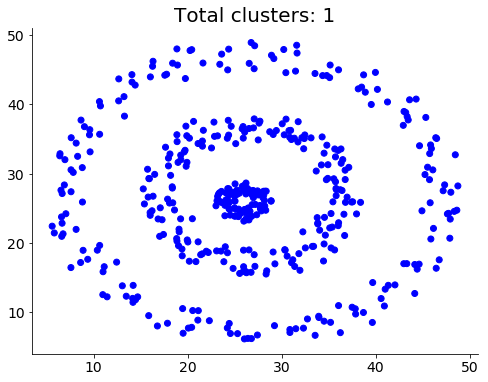

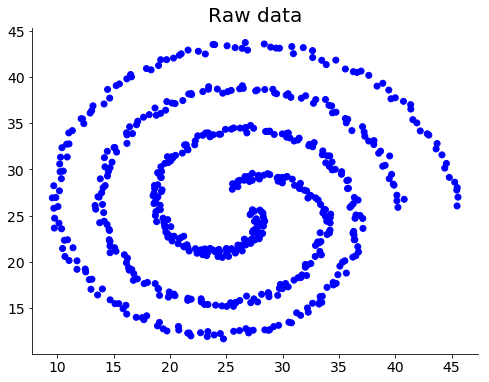

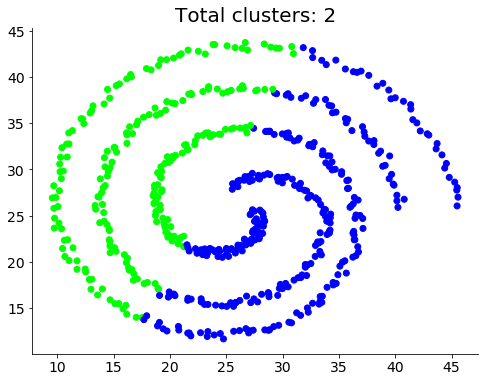

In [9]:
# Check the circles case
for source in range(3,7):
    
    # Read the data
    X = pd.read_csv('../Data/cluster'+(str)(source)+'.csv').iloc[:, [1,2]].values
    
    # Visualize the dataset
    clusters = [2] * X.shape[0]
    visualize_cluster_data(plt, X, clusters, 'Raw data')
    
    # Calculate bandwidth
    bandwidth = estimate_bandwidth(X, quantile=0.2)
    
    # Fit the clustering estimator
    estimator = MeanShift(bandwidth = bandwidth)
    estimator.fit(X)
    
    # Visualize the results
    total_clusters = len(set(estimator.labels_)) - (1 if -1 in estimator.labels_ else 0) 
    visualize_cluster_data(plt, X, estimator.labels_, 'Total clusters: ' + (str)(total_clusters), filename='file'+(str)(source)+'bandfine')